# Implementation of MCP Neuron for AND and OR Function.

In [3]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  state_neuron = []  # Initialize an empty list to store results

  for x1, x2 in zip(X1, X2):
      if (x1 + x2) >= T:  # Check if sum meets or exceeds threshold
          state_neuron.append(1)
      else:
          state_neuron.append(0)

  return state_neuron

In [4]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [5]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2), "Input lists must have the same length"

    state_neuron = []  # Initialize an empty list to store results

    for x1, x2 in zip(X1, X2):
        if (x1 + x2) >= T:  # Check if sum meets or exceeds threshold
            state_neuron.append(1)
        else:
            state_neuron.append(0)

    return state_neuron


In [6]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


• Question - 1: List out all the limitations of MCP - Neurons.
- The main limitations of MCP Neurons are that they can only solve linearly separable problems, meaning they fail for complex patterns like XOR. They also can't learn on their own and require manually set thresholds.

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
- MCP Neurons can't directly solve XOR because XOR is not linearly separable. However, we can solve it by combining multiple MCP Neurons—first using AND and OR functions, then adding an extra step where we apply a NOT AND (NAND) operation and combine the results smartly.

{Can you devise a if else rules.}
- Yes! We can create an if-else logic to solve XOR using MCP Neurons. Since XOR is not linearly separable, we need to break it down using a combination of AND, OR, and NAND (NOT AND) operations.

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [7]:
from google.colab import files
uploaded = files.upload()

Saving mnist_0_and_1.csv to mnist_0_and_1.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


Question - 1: What does the shape of X represent?
- The shape of X is (12665, 784), which means there are 12,665 images in the dataset, and each image is represented by 784 features (pixels). This suggests that the images are 28x28 grayscale images, flattened into a 1D array of 784 values.

Question - 2: What does the shape of y represent?
- The shape of y is (12665,), meaning it is a 1D array with 12,665 labels. Each label represents whether the corresponding image in X is a digit 0 or 1.

### Viewing the Dataset.

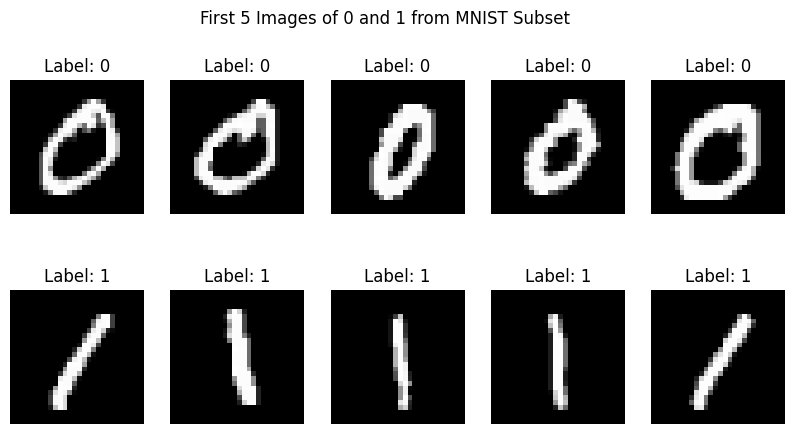

In [9]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [10]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

Question - 3: What does the weights array represent in this context?
- The weights array represents the importance of each pixel in predicting whether an image is a 0 or 1. Since each image has 784 pixels, the weight array has 784 values, where each weight determines how much influence a specific pixel has in making the classification decision.


Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?
- We initialize the weights to zero because it provides a neutral starting point for learning. However, if all weights are zero, every pixel initially contributes equally, and the model updates all weights uniformly in the first step. This can slow down learning but won’t necessarily prevent convergence. Using small random values instead of zeros can help the model break symmetry and learn faster.

## Step - 3 - Make a Decision function:

In [11]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all = np.where(predictions >= 0, 1, 0)  # Activation function (step function)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [12]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    n_samples = X.shape[0]

    for epoch in range(epochs):
        correct_predictions = 0  # Track correct predictions

        for i in range(n_samples):
            # Compute prediction using step function
            prediction = np.dot(X[i], weights) + bias
            y_pred = 1 if prediction >= 0 else 0  # Step function

            # Check if prediction is correct
            if y_pred == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias if prediction is wrong
                error = y[i] - y_pred
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        # Compute accuracy for this epoch
        accuracy = correct_predictions / n_samples

        # Print progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs} - Accuracy: {accuracy:.4f}")

    return weights, bias, accuracy

Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?
- The line output = np.dot(X[i], weights) + bias is used to calculate the total input to the neuron. It takes each feature (pixel, for example) of the input data (X[i]), multiplies it by the corresponding weight, then adds the bias. This gives us a value that tells us how much the neuron should "fire" (activate).

Question - 6: What happens when the prediction is wrong? How are the weights and
bias updated?
- If the prediction is wrong, the perceptron adjusts itself by changing the weights and bias:

First, it calculates the error, which is the difference between the true label and the predicted label.
Then, it updates the weights by adding or subtracting small amounts based on the error and the input data.
It also adjusts the bias to help make better predictions next time.
This process helps the perceptron learn from its mistakes and improve.

Question - 7:Why is the final accuracy important, and what do you expect it to be?
- The final accuracy shows how well the perceptron is doing. It's important because it tells us how many times the perceptron correctly predicted the output. For simple tasks, like AND, we expect it to be 100% accurate (or close to it). If the accuracy is lower, it means the model might need more training or adjustments to work better.

## Training the Perceptron

In [13]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 0/100 - Accuracy: 0.9967
Epoch 10/100 - Accuracy: 0.9995
Epoch 20/100 - Accuracy: 1.0000
Epoch 30/100 - Accuracy: 1.0000
Epoch 40/100 - Accuracy: 1.0000
Epoch 50/100 - Accuracy: 1.0000
Epoch 60/100 - Accuracy: 1.0000
Epoch 70/100 - Accuracy: 1.0000
Epoch 80/100 - Accuracy: 1.0000
Epoch 90/100 - Accuracy: 1.0000
The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [14]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


Question - 8:What does misclassified idx store, and how is it used in this code?

The misclassified_idx keeps track of the positions of the images that the model
got wrong.
*   It looks at where the predicted labels don't match the true labels.
*   Then, it uses those positions to show the images that were misclassified.

Question - 9: How do you interpret the result if the output is ”All images were
correctly classified!”?

If the message says "All images were correctly classified!", it means the model did a perfect job and didn’t make any mistakes while guessing.
- This is great, especially for simple tasks like AND or OR, where the model learns very easily. But for harder problems, it might not always happen.

**4.4 Task 3: Perceptron Algorithm for 3 vs 5 Classification.**

In [15]:
from google.colab import files
uploaded = files.upload()

Saving mnist_3_and_5.csv to mnist_3_and_5.csv


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df_3_5 = pd.read_csv("mnist_3_and_5.csv")  # Add the correct file path if necessary

# Filter for only digits 3 and 5
df_3_5 = df_3_5[df_3_5['label'].isin([3, 5])]

# Extract features and labels
X = df_3_5.drop(columns=["label"]).values  # 784 pixels (28x28)
y = df_3_5["label"].values  # Labels (3 or 5)

# Convert labels 3 and 5 to binary labels (0 and 1)
y = np.where(y == 3, 0, 1)

print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)

Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


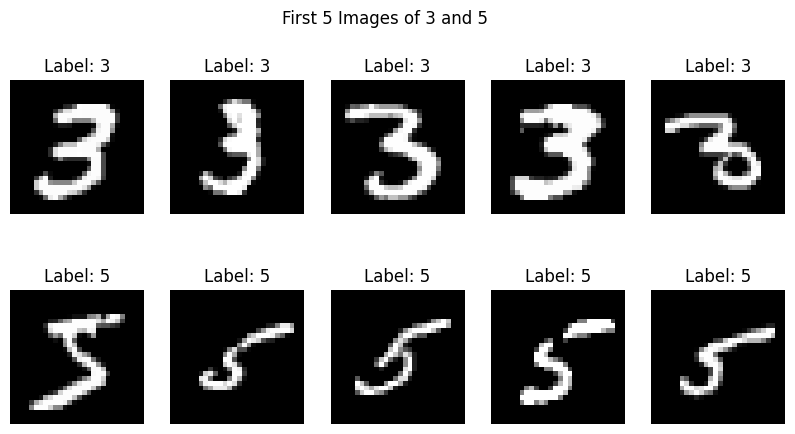

In [17]:
# Separate images for label 0 (3) and label 1 (5)
images_3 = X[y == 0]  # Get all images with label 3
images_5 = X[y == 1]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Plot first 5 images of label 3 and label 5
for i in range(5):
    axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
    axes[0, i].set_title("Label: 3")
    axes[0, i].axis("off")

    axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
    axes[1, i].set_title("Label: 5")
    axes[1, i].axis("off")

plt.suptitle("First 5 Images of 3 and 5")
plt.show()

In [18]:
def decision_function(X, weights, bias):
    """Compute the predicted labels for the input data."""
    predictions = np.dot(X, weights) + bias
    return np.where(predictions >= 0, 1, 0)

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """Train the perceptron using the Perceptron Learning Algorithm."""
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            # Compute output
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0  # Step function

            # Update weights and bias if prediction is wrong
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

    return weights, bias

# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

# Train the model
weights, bias = train_perceptron(X, y, weights, bias, learning_rate, epochs)

In [19]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

Final Accuracy: 0.9869


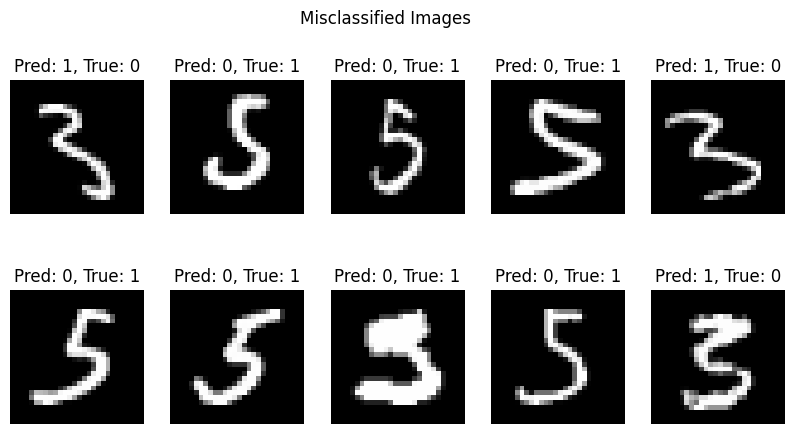

In [21]:
# Identify misclassified images
misclassified_idx = np.where(y_pred != y)[0]

if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

After visualizing the misclassified images, we can conclude about the model's performance. If the accuracy is low, it suggests that the perceptron model may need more training or a more complex approach (e.g., using a more advanced model like a neural network).